<a href="https://colab.research.google.com/github/mauricio-hack/BiseccionPython/blob/master/estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

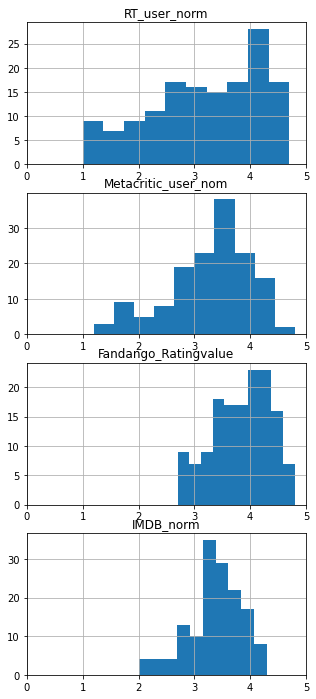

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
movie_reviews = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")

scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()




**Media **
Vamos a calcular algunas medidas estadisticas para ver que sugieren los datos visualizados en los histogramas.

In [4]:
def calc_mean(data):
    mean = data.mean()
    return mean

sel_cols = ['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue', 'IMDB_norm']

user_review = movie_reviews[sel_cols]

rt_mean, mc_mean, fg_mean, id_mean = user_review.apply(calc_mean)

print(rt_mean)

print(mc_mean)

print(fg_mean, id_mean)

3.1938356164383572
3.2595890410958885
3.8452054794520483 3.3684931506849316


**Varianza y Desviacion Estandar**
Parece que Fandango_user_reviews tienen la media mas alta y esta mas sesgado hacia la derecha, comparado con las reviews de los otros sitios.
Vamos a calcular la Varianza y la desviacion estandar para entender mejor la dispersion de estos.


In [5]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    variance = [ (x - mean) **2 for x in series]
    variance = sum(variance) / len(variance)
    return variance

def calc_stdev(series):
    variance = calc_variance(series)
    return variance ** (1/2)

rt_var, mc_var, fg_var, id_var = user_review.apply(calc_variance)
rt_stdev, mc_stdev, fg_stdev, id_stdev = user_review.apply(calc_stdev)

print(rt_var, mc_var, fg_var, id_var)

print(rt_stdev, mc_stdev, fg_stdev, id_stdev)
                                                           

0.995578438731469 0.5666546256333268 0.25110714955901703 0.228219647213361
0.9977867701726001 0.7527646548778222 0.5011059264856255 0.4777234003200607


**Scatter Plots**
Vamos a explorar si Fandango’s user rating es al menos relativamente correcto. Mas precisamente, ¿Estan las peliculas, que tienen un alto rating, en Rotten Tomatoes, IMDB, y Metacritic tambien con un rating alto en Fandango?

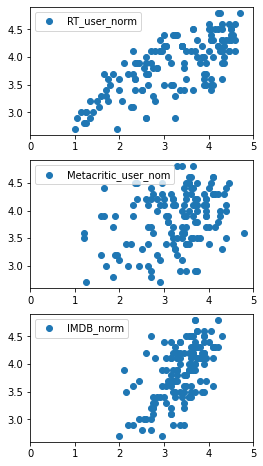

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (4, 8))
scores = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]
for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(movie_reviews[scores[i]], movie_reviews[scores[3]], label=scores[i])
    plt.xlim(0.0, 5.0)
    plt.legend()
    
    
plt.show()